In [2]:
import pandas as pd
import os
from csv_utilities import df_from_ieee_csv_file, df_from_scopus_csv_file, inject_detected_countries_to, mark_duplicates_in
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Directory containing .csv files
folder_path = 'csv'

In [4]:
# Get all IEEE .csv files in the folder
ieee_csv_files = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('ieee.csv')]

# Map each csv file to a dataframe with standardized column names
ieee_dfs = list(map(df_from_ieee_csv_file, ieee_csv_files))

In [5]:
# Get all IEEE .csv files in the folder
scopus_csv_files = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('scopus.csv')]

# Map each csv file to a dataframe with standardized column names
scopus_dfs = list(map(df_from_scopus_csv_file, scopus_csv_files))

In [6]:
dfs = pd.concat(scopus_dfs + ieee_dfs)
dfs = dfs.reset_index(drop=True)

In [8]:
mark_duplicates_in(dfs)
dfs = dfs.drop_duplicates(subset='title_canonical', keep='first')
dfs = dfs.reset_index(drop=True)

# Publications by year

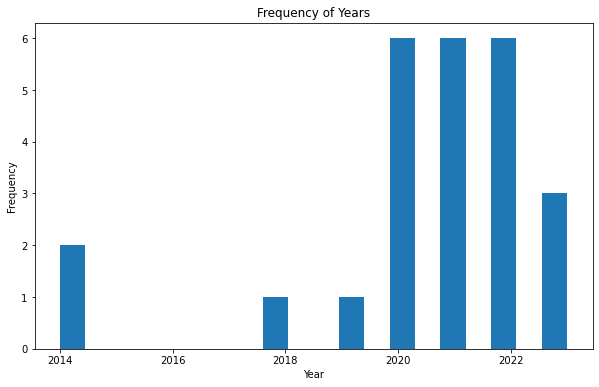

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
dfs['year'].hist(bins=20)  # Adjust the number of bins as needed
plt.title('Frequency of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [14]:
inject_detected_countries_to(dfs)

# Publications by country 

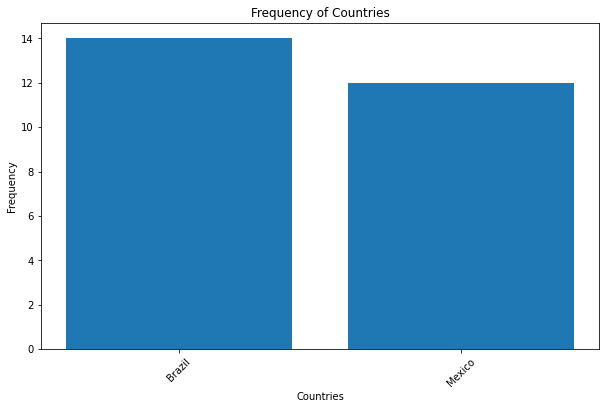

In [17]:
# Flatten the 'countries' column to get a single list of countries
all_countries = [country for sublist in dfs['countries'] for country in sublist]

# Count the frequency of each country
country_counts = dict(Counter(all_countries))

# Plotting the frequency of countries
plt.figure(figsize=(10, 6))
plt.bar(country_counts.keys(), country_counts.values())
plt.title('Frequency of Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()